## Linear Regression From Scratch OLS and Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("./home.csv")
data

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [2]:
data.isnull().sum()

size       0
bedroom    0
price      0
dtype: int64

In [3]:
data.dtypes

size       int64
bedroom    int64
price      int64
dtype: object

In [4]:
data.describe()

,size,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


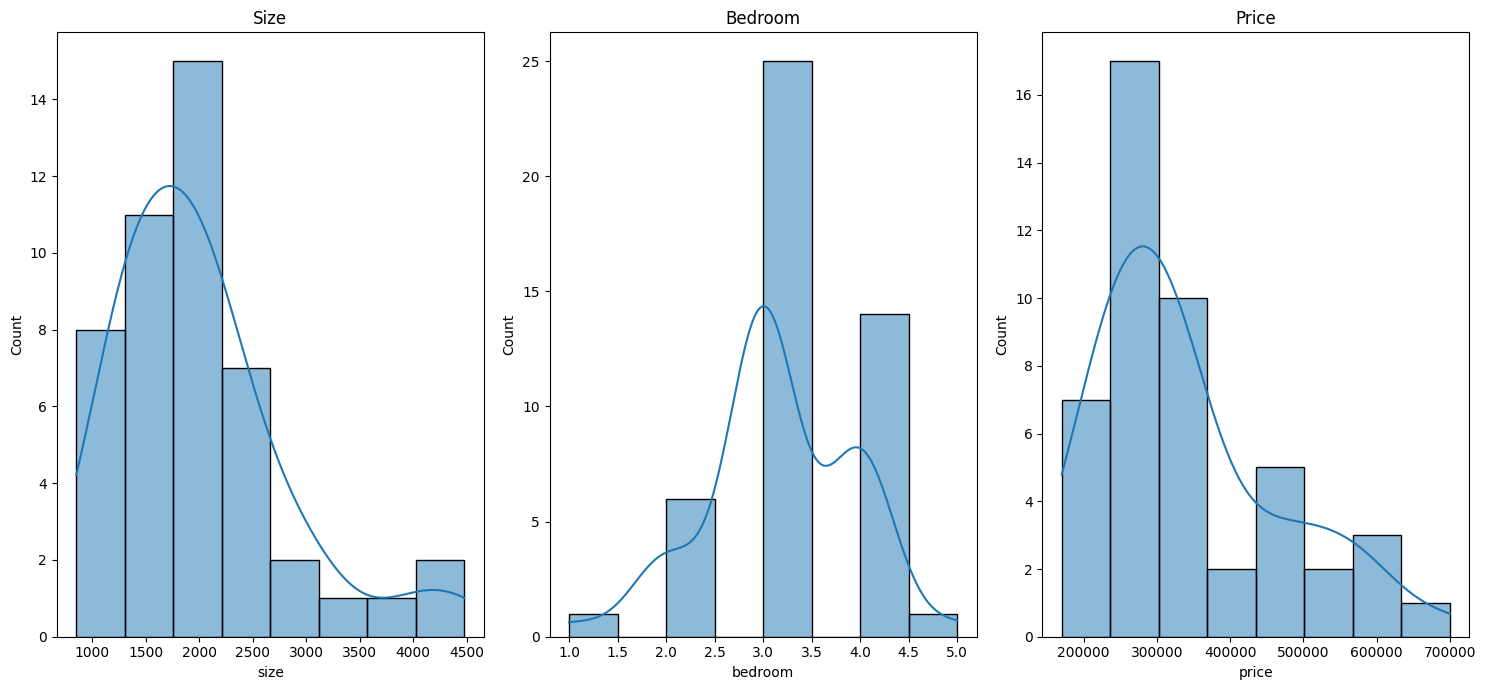

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.histplot(data["size"], kde=True)
plt.title('Size')

plt.subplot(1, 3, 2)
sns.histplot(data["bedroom"], kde=True)
plt.title('Bedroom')

plt.subplot(1, 3, 3)
sns.histplot(data["price"], kde=True)
plt.title('Price')

plt.tight_layout()
plt.show()


In [6]:
data=data.astype("float64")
data

,size,bedroom,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


In [7]:
#Normalization
def min_max_normalization(column):
    min=column.min()
    max=column.max()
    column=(column-min)/(max-min)
    return column

# Standarization
def z_score_normalization(column):
    mean=column.mean()
    std=column.std()
    column=(column-mean)/std
    return column

column_to_normalization=data.iloc[:,:-1].columns
datas=data.copy()
for i in column_to_normalization:
    datas[i]=z_score_normalization(data[i])
datas

# Hanya variable independent saja yang di standardization


,size,bedroom,price
0,0.130010,-0.223675,399900.0
1,-0.504190,-0.223675,329900.0
2,0.502476,-0.223675,369000.0
3,-0.735723,-1.537767,232000.0
4,1.257476,1.090417,539900.0
5,-0.019732,1.090417,299900.0
6,-0.587240,-0.223675,314900.0
7,-0.721881,-0.223675,198999.0
8,-0.781023,-0.223675,212000.0
9,-0.637573,-0.223675,242500.0


In [8]:
x=datas.iloc[:,:-1].values
y=datas.iloc[:,-1].values
x.shape,y.shape

((47, 2), (47,))

In [9]:
# from sklearn.preprocessing import StandardScaler

# sc=StandardScaler()
# print(data.iloc[:,:-1].values.shape)
# print(data.iloc[:,-1].values.reshape(1,-1).shape)

# x_train=sc.fit_transform(data.iloc[:,:-1].values)
# y_train=sc.fit_transform(data.iloc[:,-1].values.reshape(-1,1))
# x_train.shape,y_train.shape

In [10]:
# print(len(list(datas.values)[0]))
# dataset=datas.values
# dataset.shape

In [11]:
import random
random.seed(42)

def split_data(x,y,test_size=0.8):
    trainx=[]
    trainy=[]
    train_size=int(test_size*len(x))
    dataset_copy_x=list(x)
    dataset_copy_y=list(y)
    # print(dataset_copy)
    while len(trainx)<train_size:
        index=random.randrange(len(dataset_copy_x))
        trainx.append(dataset_copy_x.pop(index))
        trainy.append(dataset_copy_y.pop(index))
    return np.array(trainx),np.array(dataset_copy_x),np.array(trainy),np.array(dataset_copy_y)

x_train,x_test,y_train,y_test=split_data(datas.iloc[:,:-1].values,datas.iloc[:,-1].values)

len(x_train),len(x_test),len(y_train),len(y_test)

(37, 10, 37, 10)

In [12]:
class LinearRegression():
    def __init__(self, lr=0.0001, n_iters=1000, threshold=1e-6):
        self.lr = lr
        self.n_iters = n_iters
        self.threshold = threshold
        
        self.weights = []
        self.bias = None
        
    def MSE(self,y,y_pred):
        return np.mean((y-y_pred)**2)
    
    def fit_gradient_descent(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        list_weight = []
        mse = []
        prev_mse = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(x, self.weights) + self.bias
            # print(y,y_pred)
            curr_mse = self.MSE(y, y_pred)
            
            if curr_mse and abs(prev_mse - curr_mse) < self.threshold:
                break
            
            prev_mse = curr_mse
            
            mse.append(curr_mse)
            list_weight.append(self.weights)
            
            derivative_weight = (1/n_samples) * 2 * np.dot(x.T, (y_pred - y))
            derivative_bias = (1/n_samples) * np.sum(2 * (y_pred - y))
            
            self.weights = self.weights - self.lr * derivative_weight
            self.bias = self.bias - self.lr * derivative_bias
        
        plt.figure(figsize=(12, 6))
        plt.plot(list_weight, mse, marker="+")
        plt.title("MSE VS Weights")
        plt.xlabel("Weight")
        plt.ylabel("MSE")
        plt.show()
        
        print("Final MSE:", mse[-1])
    
    def fit_OLS_Ordinary_Least_Squares(self,x,y):
        x = np.insert(x, 0, 1, axis=1) # axis=1, itu berarti sepanjang sumbu column (vertical), axis=0, itu berarti sepanjang sumbu row (horizontal)
        print(x.shape,np.dot(x.T, x).shape)
        
        betas = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y) # follows the equation as above
        print("betas:",betas)
        self.bias = betas[0]
        self.weights = betas[1:]
            
    def predict(self,x):
        return np.dot(x,self.weights)+self.bias
    
            
    

In [13]:
# def MSE(y,y_pred):
#     return np.mean((y-y_pred)**2)

def RMSE(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

def MAE(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))

def R2_Score(y_true,y_pred):
    SSRes=np.sum((y_true-y_pred)**2)
    SSTot=np.sum((y_true-y_pred.mean())**2)
    return 1 -(SSRes/SSTot)

In [14]:
x_train.shape,y_train.shape

((37, 2), (37,))

(37, 3) (3, 3)
betas: [344283.15568428 116737.54848637 -11711.08027233]
Predict with OLS:
[329209.76647359 272473.91191436 680028.77182561 214597.40771238
 424069.22241295 338542.01043346 230686.80698518 656784.90446957
 381763.55436683 193556.96056707]


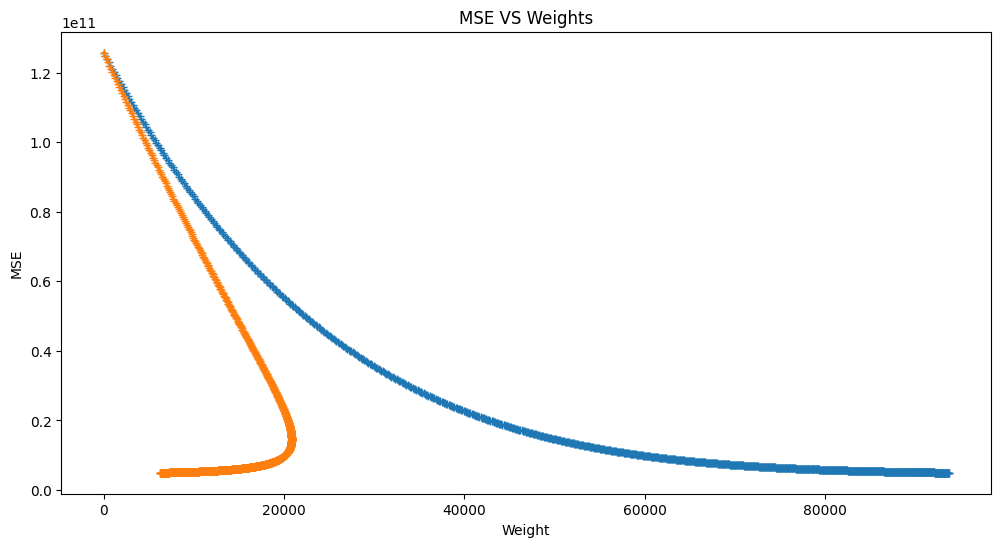

Final MSE: 4989733403.130828
Predict with Gradient Descent:
[339561.05147377 273402.60797331 642030.13616787 226895.91834779
 395217.08435285 305923.33332295 198687.91522939 602784.19326289
 361222.34675856 189420.53469252]


In [15]:
Regressor_Grad_Desc=LinearRegression(lr=0.002)
Regressor_OLS=LinearRegression()
Regressor_OLS.fit_OLS_Ordinary_Least_Squares(x_train,y_train)
y_pred1=Regressor_OLS.predict(x_test)
print("Predict with OLS:")
print(y_pred1)

Regressor_Grad_Desc.fit_gradient_descent(x_train,y_train)
# print(Regressor.weights,Regressor.bias)
y_pred2=Regressor_Grad_Desc.predict(x_test)
print("Predict with Gradient Descent:")
print(y_pred2)

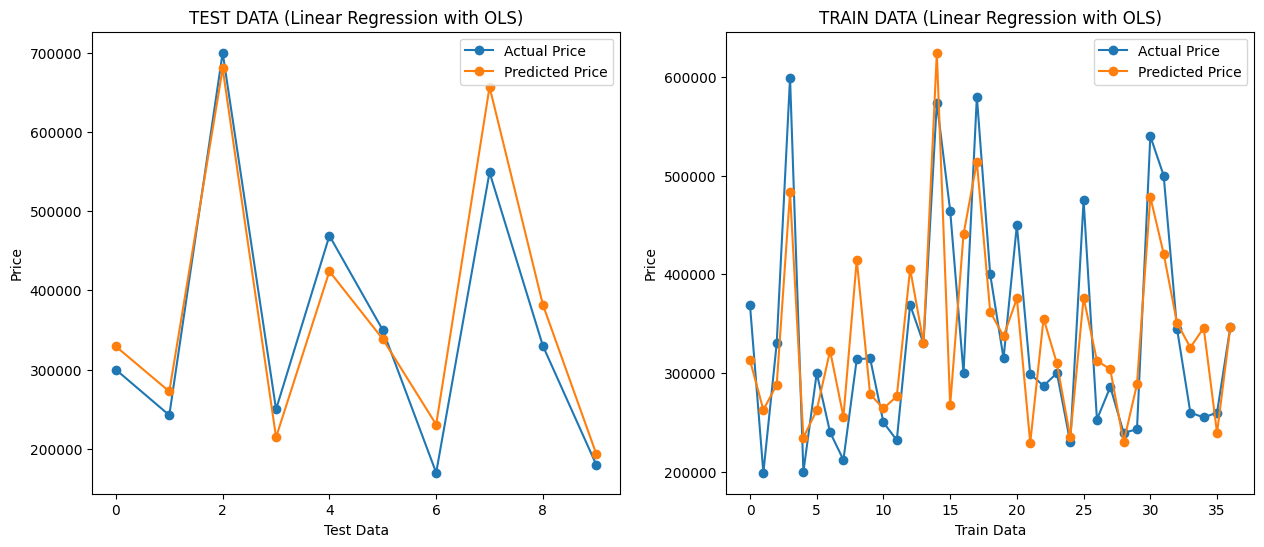

RMSE_Test: 48718.967166391674
MAE_Test: 40483.84923921965
R2_Test: 0.9105011513297784

RMSE_Train: 67850.89807201998
MAE_Train: 54231.33853332877
R2_Train: 0.6256104736787946


In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test,marker="o",label="Actual Price")
ax[0].plot(Regressor_OLS.predict(x_test),marker="o",label="Predicted Price")
ax[0].set_title("TEST DATA (Linear Regression with OLS)")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train,marker="o",label="Actual Price")
ax[1].plot(Regressor_OLS.predict(x_train),marker="o",label="Predicted Price")
ax[1].set_title("TRAIN DATA (Linear Regression with OLS)")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

rmse=RMSE(y_test,Regressor_OLS.predict(x_test))
mae=MAE(y_test,Regressor_OLS.predict(x_test))
r2=R2_Score(y_test,Regressor_OLS.predict(x_test))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train,Regressor_OLS.predict(x_train))
mae=MAE(y_train,Regressor_OLS.predict(x_train))
r2=R2_Score(y_train,Regressor_OLS.predict(x_train))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

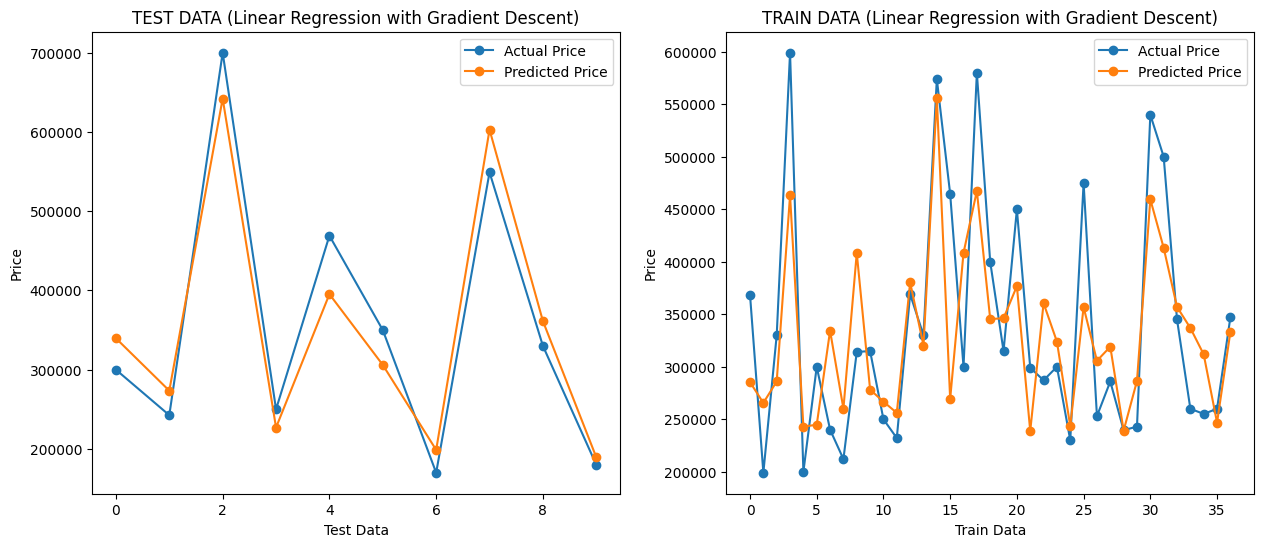

RMSE_Test: 43101.22787702957
MAE_Test: 39261.217719898035
R2_Test: 0.9290666807719253

RMSE_Train: 70628.38378328452
MAE_Train: 57164.07669937384
R2_Train: 0.5960585392755656


In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test,marker="o",label="Actual Price")
ax[0].plot(Regressor_Grad_Desc.predict(x_test),marker="o",label="Predicted Price")
ax[0].set_title("TEST DATA (Linear Regression with Gradient Descent)")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train,marker="o",label="Actual Price")
ax[1].plot(Regressor_Grad_Desc.predict(x_train),marker="o",label="Predicted Price")
ax[1].set_title("TRAIN DATA (Linear Regression with Gradient Descent)")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

rmse=RMSE(y_test,Regressor_Grad_Desc.predict(x_test))
mae=MAE(y_test,Regressor_Grad_Desc.predict(x_test))
r2=R2_Score(y_test,Regressor_Grad_Desc.predict(x_test))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train,Regressor_Grad_Desc.predict(x_train))
mae=MAE(y_train,Regressor_Grad_Desc.predict(x_train))
r2=R2_Score(y_train,Regressor_Grad_Desc.predict(x_train))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

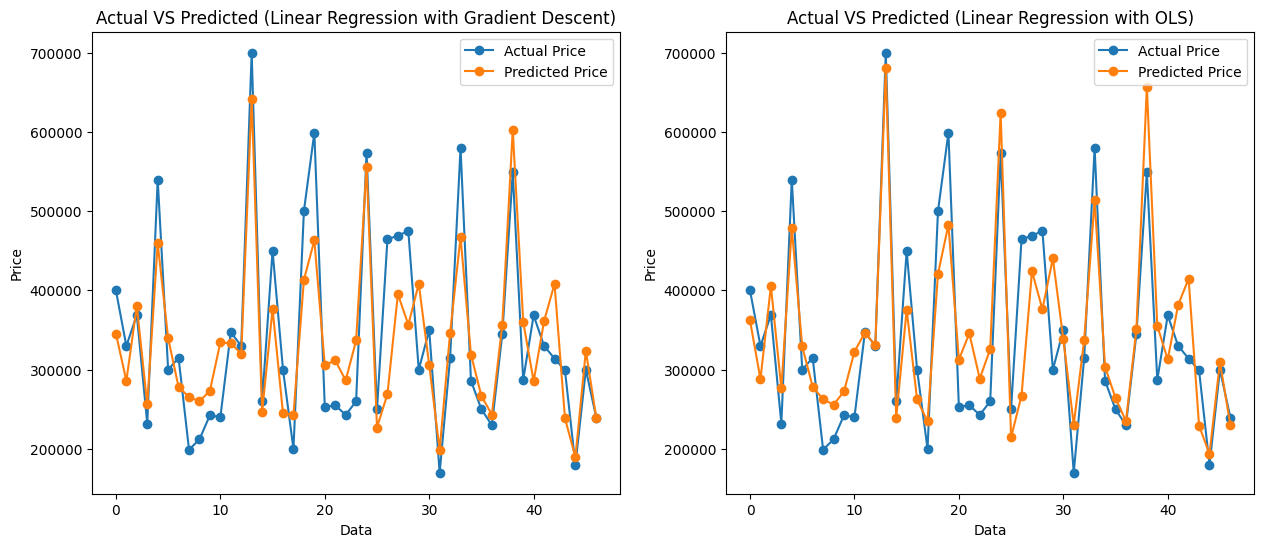

RMSE_All_Gradient_Descent: 65743.99033956215
MAE_All_Gradient_Descent: 53354.95776757047
R2_All_Gradient_Descent: 0.718162342733071

RMSE_All_OLS: 64259.103052001854
MAE_All_OLS: 51306.340811177906
R2_All:_OLS 0.730420320646572


In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk model Linear Regression with Gradient Descent
axs[0].plot(y, marker="o", label="Actual Price")
axs[0].plot(Regressor_Grad_Desc.predict(x), marker="o", label="Predicted Price")
axs[0].set_title("Actual VS Predicted (Linear Regression with Gradient Descent)")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Price")
axs[0].legend()

# Plot untuk model Linear Regression with OLS
axs[1].plot(y, marker="o", label="Actual Price")
axs[1].plot(Regressor_OLS.predict(x), marker="o", label="Predicted Price")
axs[1].set_title("Actual VS Predicted (Linear Regression with OLS)")
axs[1].set_xlabel("Data")
axs[1].set_ylabel("Price")
axs[1].legend()

plt.show()

rmse=RMSE(y,Regressor_Grad_Desc.predict(x))
mae=MAE(y,Regressor_Grad_Desc.predict(x))
r2=R2_Score(y,Regressor_Grad_Desc.predict(x))
print("RMSE_All_Gradient_Descent:",rmse)
print("MAE_All_Gradient_Descent:",mae)
print("R2_All_Gradient_Descent:",r2)
print()

rmse=RMSE(y,Regressor_OLS.predict(x))
mae=MAE(y,Regressor_OLS.predict(x))
r2=R2_Score(y,Regressor_OLS.predict(x))
print("RMSE_All_OLS:",rmse)
print("MAE_All_OLS:",mae)
print("R2_All:_OLS",r2)

In [19]:
data_convert=data.copy()
data_convert["predicted price"]=np.round(Regressor_Grad_Desc.predict(x))
data_convert.to_excel("HomePredicted.xlsx",index=False)
data_convert.to_csv("HomePredicted.csv",index=False,mode="w")
data_convert

,size,bedroom,price,predicted price
0,2104.0,3.0,399900.0,345405.0
1,1600.0,3.0,329900.0,285915.0
2,2400.0,3.0,369000.0,380344.0
3,1416.0,2.0,232000.0,255994.0
4,3000.0,4.0,539900.0,459369.0
5,1985.0,4.0,299900.0,339561.0
6,1534.0,3.0,314900.0,278124.0
7,1427.0,3.0,198999.0,265494.0
8,1380.0,3.0,212000.0,259946.0
9,1494.0,3.0,242500.0,273403.0


# Jika tanpa normalisasi atau standardisasi

In [20]:
data_not_norm=data.copy()
data_not_norm

,size,bedroom,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


In [21]:
x1=data_not_norm.iloc[:,:-1].values
y1=data_not_norm.iloc[:,-1].values

x_train1,x_test1,y_train1,y_test1=split_data(x1,y1)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((37, 2), (10, 2), (37,), (10,))

(37, 3) (3, 3)
betas: [104796.402818      150.44027386 -20461.69443674]
Predict with OLS:
[359937.65571055 474270.44665293 314803.75636066 368962.25495049
 347904.25099339 234774.98224189 343688.2889419  657055.3793936
 314205.62964861 223939.64814054]


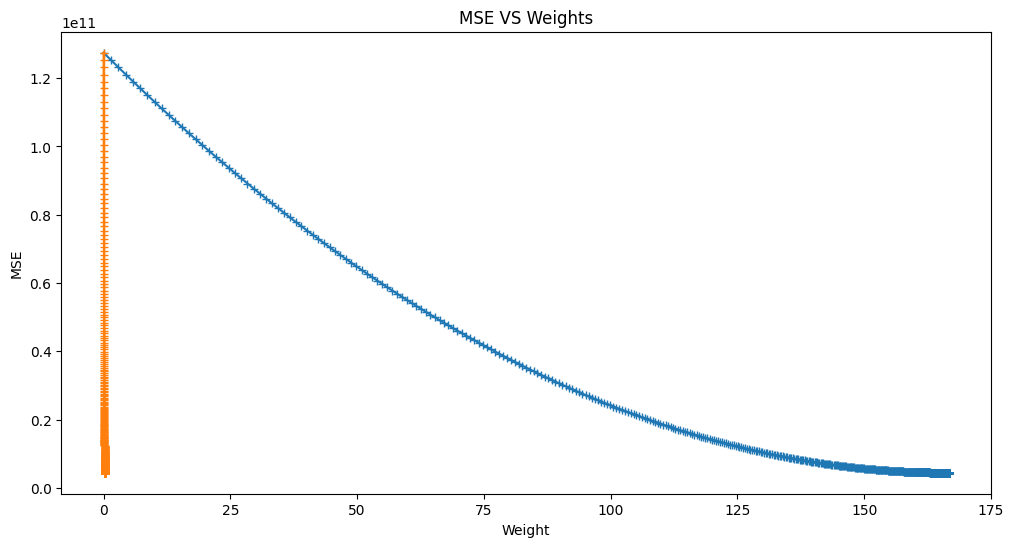

Final MSE: 4459784993.019129
Predict with Gradient Descent:
[350804.31886501 500196.15985111 323460.59355294 383483.99342779
 314790.01097585 166732.02332029 355473.07348619 702775.13442875
 277442.11772038 200078.8925126 ]


In [22]:
Regressor_Grad_Desc=LinearRegression(lr=0.000000001)
Regressor_OLS=LinearRegression()

Regressor_OLS.fit_OLS_Ordinary_Least_Squares(x_train1,y_train1)
y_pred1=Regressor_OLS.predict(x_test1)
print("Predict with OLS:")
print(y_pred1)

Regressor_Grad_Desc.fit_gradient_descent(x_train1,y_train1)
# print(Regressor.weights,Regressor.bias)
y_pred2=Regressor_Grad_Desc.predict(x_test1)
print("Predict with Gradient Descent:")
print(y_pred2)

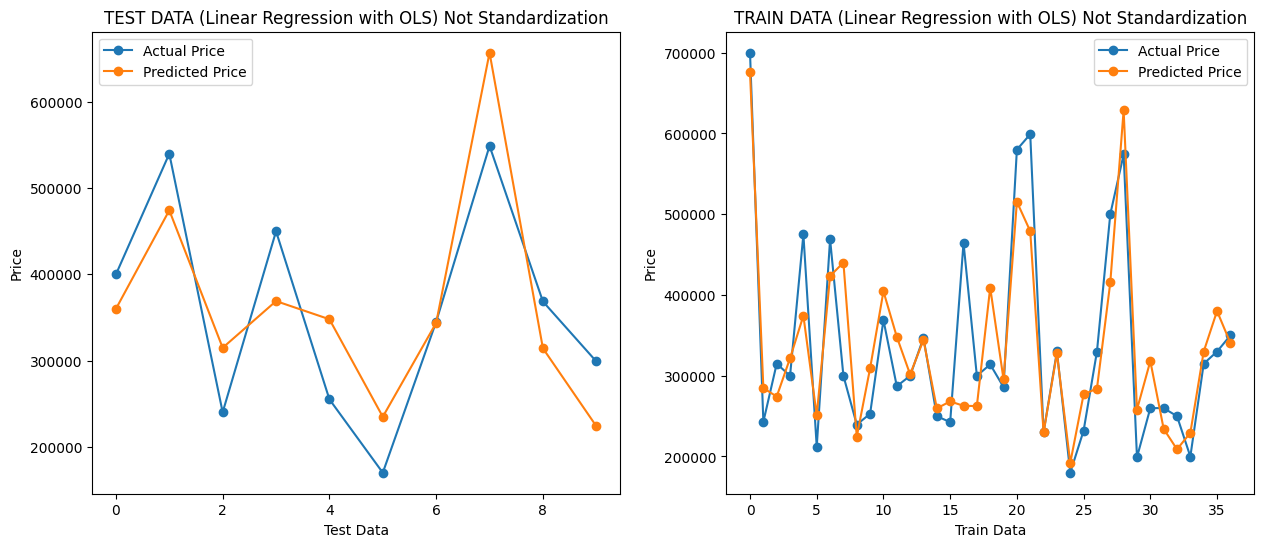

RMSE_Test: 71519.56461693936
MAE_Test: 65783.54449445228
R2_Test: 0.6432263773536273

RMSE_Train: 62418.09369605405
MAE_Train: 46544.24041470189
R2_Train: 0.7471833626487927


In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test1,marker="o",label="Actual Price")
ax[0].plot(Regressor_OLS.predict(x_test1),marker="o",label="Predicted Price")
ax[0].set_title("TEST DATA (Linear Regression with OLS) Not Standardization")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train1,marker="o",label="Actual Price")
ax[1].plot(Regressor_OLS.predict(x_train1),marker="o",label="Predicted Price")
ax[1].set_title("TRAIN DATA (Linear Regression with OLS) Not Standardization")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

rmse=RMSE(y_test1,Regressor_OLS.predict(x_test1))
mae=MAE(y_test1,Regressor_OLS.predict(x_test1))
r2=R2_Score(y_test1,Regressor_OLS.predict(x_test1))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train1,Regressor_OLS.predict(x_train1))
mae=MAE(y_train1,Regressor_OLS.predict(x_train1))
r2=R2_Score(y_train1,Regressor_OLS.predict(x_train1))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

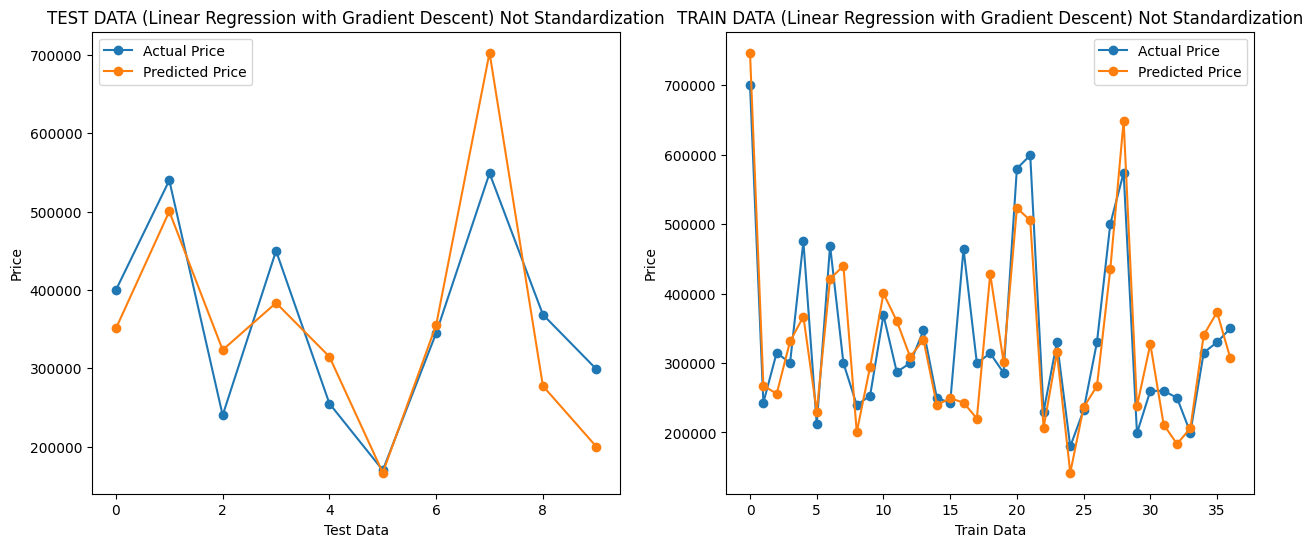

[399900. 539900. 239999. 449900. 255000. 169900. 345000. 549000. 368500.
 299000.]
[350804.319 500196.16  323460.594 383483.993 314790.011 166732.023
 355473.073 702775.134 277442.118 200078.893]

RMSE_Test: 77962.80299823517
MAE_Test: 65586.23067465352
R2_Test: 0.5763777964877419

RMSE_Train: 66781.62134836182
MAE_Train: 51452.10802138269
R2_Train: 0.7116743256690355


In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(y_test1,marker="o",label="Actual Price")
ax[0].plot(Regressor_Grad_Desc.predict(x_test1),marker="o",label="Predicted Price")
ax[0].set_title("TEST DATA (Linear Regression with Gradient Descent) Not Standardization")
ax[0].set_xlabel("Test Data")
ax[0].set_ylabel("Price")
ax[0].legend()

ax[1].plot(y_train1,marker="o",label="Actual Price")
ax[1].plot(Regressor_Grad_Desc.predict(x_train1),marker="o",label="Predicted Price")
ax[1].set_title("TRAIN DATA (Linear Regression with Gradient Descent) Not Standardization")
ax[1].set_xlabel("Train Data")
ax[1].set_ylabel("Price")
ax[1].legend()
plt.show()

print(y_test1)
print(np.round(Regressor_Grad_Desc.predict(x_test1),3))
print()

rmse=RMSE(y_test1,Regressor_Grad_Desc.predict(x_test1))
mae=MAE(y_test1,Regressor_Grad_Desc.predict(x_test1))
r2=R2_Score(y_test1,Regressor_Grad_Desc.predict(x_test1))
print("RMSE_Test:",rmse)
print("MAE_Test:",mae)
print("R2_Test:",r2)
print()

rmse=RMSE(y_train1,Regressor_Grad_Desc.predict(x_train1))
mae=MAE(y_train1,Regressor_Grad_Desc.predict(x_train1))
r2=R2_Score(y_train1,Regressor_Grad_Desc.predict(x_train1))
print("RMSE_Train:",rmse)
print("MAE_Train:",mae)
print("R2_Train:",r2)

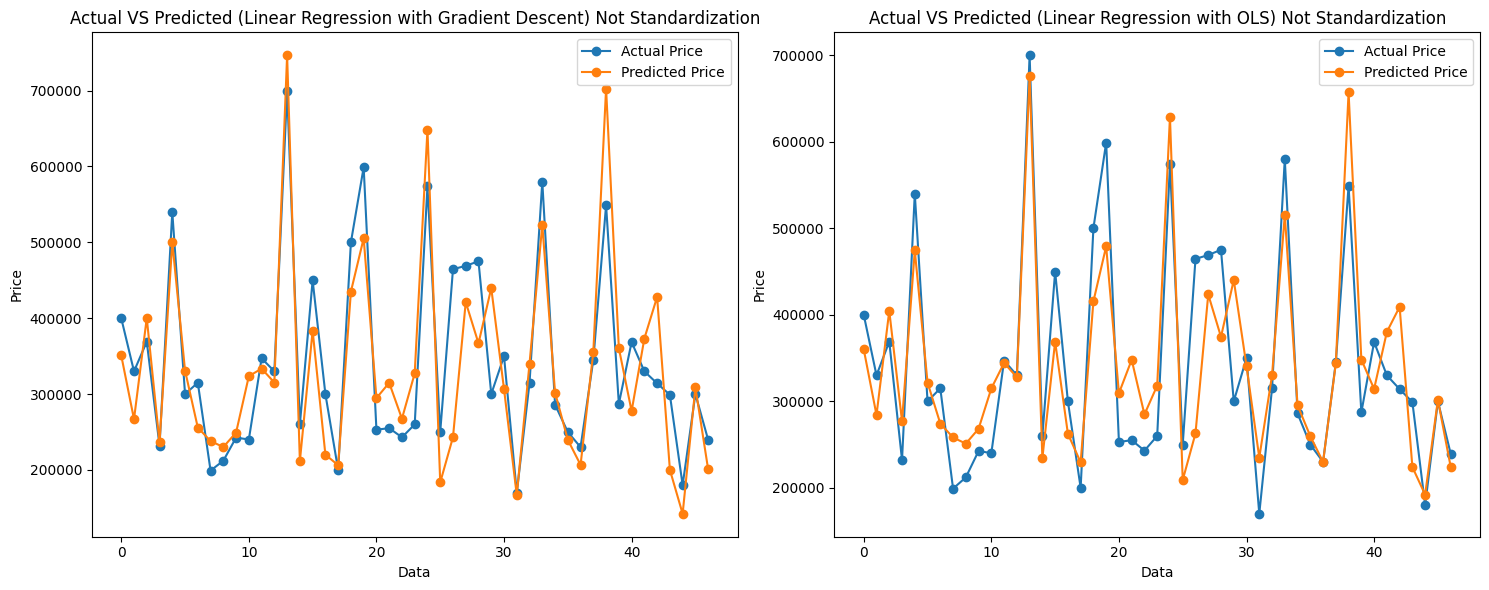

RMSE_All_Gradient_Descent: 69311.81927092114
MAE_All_Gradient_Descent: 54459.36816037651
R2_All_Gradient_Descent: 0.6870077523327356

RMSE_All_OLS: 64462.286977932905
MAE_All_OLS: 50637.70936784027
R2_All:_OLS 0.728451660617139


In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk model Linear Regression with Gradient Descent
axs[0].plot(y1, marker="o", label="Actual Price")
axs[0].plot(Regressor_Grad_Desc.predict(x1), marker="o", label="Predicted Price")
axs[0].set_title("Actual VS Predicted (Linear Regression with Gradient Descent) Not Standardization")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Price")
axs[0].legend()

# Plot untuk model Linear Regression with OLS
axs[1].plot(y1, marker="o", label="Actual Price")
axs[1].plot(Regressor_OLS.predict(x1), marker="o", label="Predicted Price")
axs[1].set_title("Actual VS Predicted (Linear Regression with OLS) Not Standardization")
axs[1].set_xlabel("Data")
axs[1].set_ylabel("Price")
axs[1].legend()

plt.tight_layout()

plt.show()

rmse=RMSE(y1,Regressor_Grad_Desc.predict(x1))
mae=MAE(y1,Regressor_Grad_Desc.predict(x1))
r2=R2_Score(y1,Regressor_Grad_Desc.predict(x1))
print("RMSE_All_Gradient_Descent:",rmse)
print("MAE_All_Gradient_Descent:",mae)
print("R2_All_Gradient_Descent:",r2)
print()

rmse=RMSE(y1,Regressor_OLS.predict(x1))
mae=MAE(y1,Regressor_OLS.predict(x1))
r2=R2_Score(y1,Regressor_OLS.predict(x1))
print("RMSE_All_OLS:",rmse)
print("MAE_All_OLS:",mae)
print("R2_All:_OLS",r2)

In [26]:
# xtrain=pd.DataFrame(x_train,columns=data.columns[:-1])
# xtest=pd.DataFrame(x_test,columns=data.columns[:-1])
# xdata=pd.concat([xtrain,xtest],axis=0)
# xdata=xdata.reset_index(drop=True)


# ytrain=pd.DataFrame(y_train,columns=[data.columns[-1]])
# ytest=pd.DataFrame(y_test,columns=[data.columns[-1]])
# ydata=pd.concat([ytrain,ytest],axis=0)
# ydata=ydata.reset_index(drop=True)


# data_convert=pd.concat([xdata,ydata],axis=1)
# data_convert["predicted price"]=Regressor.predict(x)

# data_convert.to_excel("HomePredicted.xlsx",index=False)
# data_convert.to_csv("HomePredicted.csv",index=False,mode="w")

# data_convert

In [27]:
data_not_norm["predicted price"]=np.round(Regressor_Grad_Desc.predict(x1),3)
data_convert=data_not_norm.copy()
data_convert.to_csv("HomePredicted_NotNorm.csv",index=False,mode="w")
data_convert.to_excel("HomePredicted_NotNorm.xlsx",index=False)
data_convert


,size,bedroom,price,predicted price
0,2104.0,3.0,399900.0,350804.319
1,1600.0,3.0,329900.0,266771.559
2,2400.0,3.0,369000.0,400156.892
3,1416.0,2.0,232000.0,236092.664
4,3000.0,4.0,539900.0,500196.160
5,1985.0,4.0,299900.0,330963.519
6,1534.0,3.0,314900.0,255767.269
7,1427.0,3.0,198999.0,237926.981
8,1380.0,3.0,212000.0,230090.592
9,1494.0,3.0,242500.0,249098.002


## No.2

### 1. How to avoid the overfitting in Model Supervised Learning ?
### 2. Explain of Limitations of Cross-Validation!
### 3. Calculate output k-fold Cross-Validation
       for dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

1. 
- ##### Overfitting:
    Overfitting occurs when the model captures noise and irrelevant patterns in the training data, leading to poor performance on unseen data.
    It happens when the model is too complex relative to the amount of training data available.
    In overfitting, the model has low bias (it fits the training data well) but high variance (it performs poorly on new data).
    Methods to avoid overfitting include cross-validation, training with more data, removing features, early stopping, regularization, and ensembling.

- ##### Underfitting:
    Underfitting occurs when the model is too simple to capture the underlying structure of the data.
    It happens when the model is too basic or trained for too short a time.
    In underfitting, the model has high bias (it fails to capture the underlying patterns in the data) but low variance (it performs consistently but poorly on both training and test data).
    Methods to avoid underfitting include increasing the complexity of the model (e.g., by adding more features) and training the model for a longer time.
    Limitations of Cross-Validation:

2. 
##### Limitations of Cross-Validation
While cross-validation is a valuable technique for estimating the performance of a model, it has some limitations.
Cross-validation may produce unreliable results if the data is inconsistent or if there are drastic differences between the training and validation sets.
For example, in predictive modeling for stock market values, future data may differ significantly from past data, leading to discrepancies between training and validation sets.

3.

In [28]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import KFold

# dataset = np.array([[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]])
# target = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14])  # Target values corresponding to the dataset

# model = LinearRegression()

# k_fold = KFold(n_splits=5)

# scores = cross_val_score(model, dataset, target, cv=k_fold)
# print("Cross-validated scores:", scores)
# print("Mean score:", scores.mean())

In [29]:
from sklearn.model_selection import KFold

dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

# number folds (k)
k = 5

# kfold
kf = KFold(n_splits=k)

fold_num = 1
for train_indices, val_indices in kf.split(dataset):
    print(f"Fold {fold_num}:")
    print("Training indices:", train_indices)
    print("Validation indices:", val_indices)
    print()
    fold_num += 1

Fold 1:
Training indices: [2 3 4 5 6 7 8 9]
Validation indices: [0 1]

Fold 2:
Training indices: [0 1 4 5 6 7 8 9]
Validation indices: [2 3]

Fold 3:
Training indices: [0 1 2 3 6 7 8 9]
Validation indices: [4 5]

Fold 4:
Training indices: [0 1 2 3 4 5 8 9]
Validation indices: [6 7]

Fold 5:
Training indices: [0 1 2 3 4 5 6 7]
Validation indices: [8 9]



In [30]:
# Tanpa library
dataset = [[6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]

k = 5

fold_size = len(dataset) // k

for i in range(k):
    start_val = i * fold_size
    end_val = (i + 1) * fold_size
    
    val_set = dataset[start_val:end_val]
    val_set=[i for i in range(start_val,end_val)]
    
    train_set = dataset[:start_val] + dataset[end_val:]
    train_set=np.array([i for i in range(start_val)]+([i for i in range(end_val,len(dataset))]))
    
    print(f"Fold {i+1}:")
    print("Training set:", train_set)
    print("Validation set:", val_set)
    print()


Fold 1:
Training set: [2 3 4 5 6 7 8 9]
Validation set: [0, 1]

Fold 2:
Training set: [0 1 4 5 6 7 8 9]
Validation set: [2, 3]

Fold 3:
Training set: [0 1 2 3 6 7 8 9]
Validation set: [4, 5]

Fold 4:
Training set: [0 1 2 3 4 5 8 9]
Validation set: [6, 7]

Fold 5:
Training set: [0 1 2 3 4 5 6 7]
Validation set: [8, 9]

